In [6]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna(subset=["TotalCharges"]) 

In [8]:
df.drop("customerID", axis=1, inplace=True) 

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

for col in binary_cols:
    df[col] = le.fit_transform(df[col]) 

In [10]:
df = pd.get_dummies(df, drop_first=True) 

In [11]:
from sklearn.preprocessing import StandardScaler

X = df.drop("Churn", axis=1)
y = df["Churn"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2%}") 

Test Accuracy: 78.75%


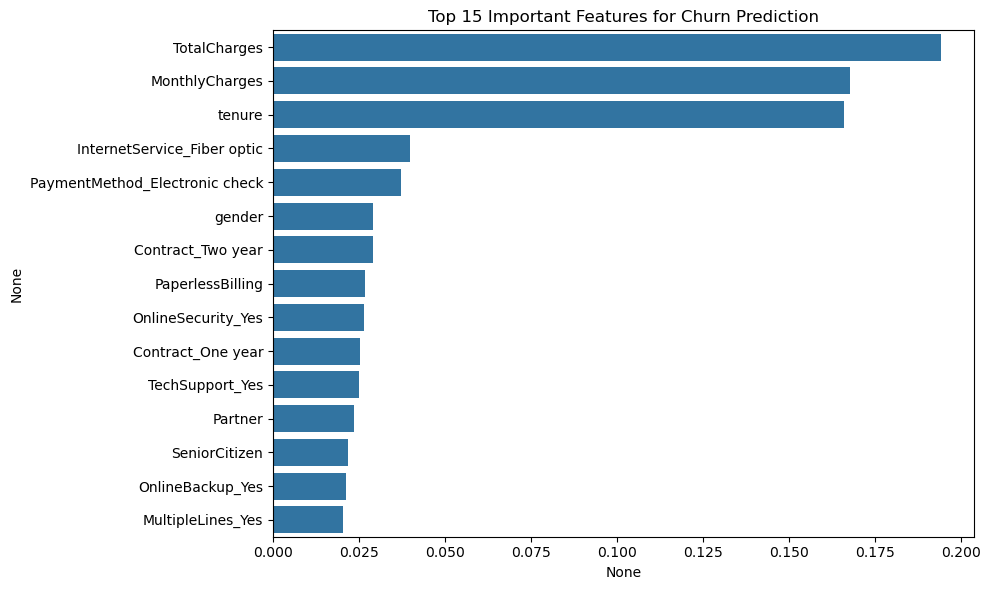

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(
    model.feature_importances_, index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[:15], y=feature_importance.index[:15])
plt.title("Top 15 Important Features for Churn Prediction")
plt.tight_layout()
plt.show() 

In [15]:
import joblib

joblib.dump(model, "random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']